In [ ]:
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
drive_auth()

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=2982e9ce377c3607f9f5e2f365cd455f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhblMwWU5DdnJnWFVONlhYRm44TjVSN0FkMkpVdHRYS1BRdkpaU2xyX2d2bWwtdU9PcVUtUnN4RXQ5d1hxazBPZVVqZyIsInN0YXRlIjoiMjk4MmU5Y2UzNzdjMzYwN2Y5ZjVlMmYzNjVjZDQ1NWYifQ==


In [ ]:
file <- drive_get("prak/data/archive.zip")
drive_download(file, path = "archive.zip", overwrite = TRUE)

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• archive.zip <id: 1X58B4nowGWc3sj8PMV0kXaZaCf4pmY56>

Saved locally as:

• archive.zip



In [ ]:
unzip("archive.zip", exdir = "data_folder")

list_of_files <- list.files("data_folder", full.names = TRUE)
print(list_of_files)
library(readr)
file_path <- "data_folder/train.csv"
df <- read_csv(file_path)
head(df, 10)


[1] "data_folder/sample_submission.csv" "data_folder/test.csv"             
[3] "data_folder/train.csv"            


Rows: 29451 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): POSTED_BY, BHK_OR_RK, ADDRESS
dbl (9): UNDER_CONSTRUCTION, RERA, BHK_NO., SQUARE_FT, READY_TO_MOVE, RESALE...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Owner,0,0,2,BHK,1300.2364,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0
Dealer,0,0,2,BHK,1275.0000,1,1,"Vishweshwara Nagar,Mysore",12.27454,76.64460,51.0
Owner,0,0,2,BHK,933.1597,1,1,"Jigani,Bangalore",12.77803,77.63219,43.0
Owner,0,1,2,BHK,929.9211,1,1,"Sector-1 Vaishali,Ghaziabad",28.64230,77.34450,62.5
Dealer,1,0,2,BHK,999.0092,0,1,"New Town,Kolkata",22.59220,88.48491,60.5
Owner,0,0,3,BHK,1250.0000,1,1,"South Chittoor,Kochi",10.03328,76.28257,42.0
Dealer,0,0,3,BHK,1495.0540,1,1,"Sodala,Jaipur",26.91635,75.79560,66.5
Owner,0,1,3,BHK,1181.0129,1,1,"Kharar,Mohali",30.74000,76.65000,52.0
Dealer,0,1,2,BHK,1040.0000,1,1,"Bileshivale,Bangalore",13.05420,77.67400,41.6


#1. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:

##a. Стьюдента, включая односторонние варианты, когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности;

In [ ]:
set.seed(123)
n <- 30
mean1 <- 50
mean2 <- 52
sd1 <- 10
sd2 <- 10

sample1 <- rnorm(n, mean = mean1, sd = sd1)
sample2 <- rnorm(n, mean = mean2, sd = sd2)

alpha_values <- c(0.1, 0.05, 0.01)

evaluate_hypothesis <- function(p_value, alpha) {
  if (p_value < alpha) {
    return("Отвергаем нулевую гипотезу")
  } else {
    return("Принимаем нулевую гипотезу")
  }
}

for (alpha in alpha_values) {
  cat("\nРезультаты t-теста при уровне значимости alpha =", alpha, "\n")

  t_test_two_sided <- t.test(sample1, sample2, conf.level = 1 - alpha)
  cat("Двусторонний t-тест:\n")
  print(t_test_two_sided)
  cat("Решение: ", evaluate_hypothesis(t_test_two_sided$p.value, alpha), "\n\n")

  t_test_one_sided_greater <- t.test(sample1, sample2, alternative = "greater", conf.level = 1 - alpha)
  cat("Односторонний t-тест (среднее первого больше второго):\n")
  print(t_test_one_sided_greater)
  cat("Решение: ", evaluate_hypothesis(t_test_one_sided_greater$p.value, alpha), "\n\n")

  t_test_one_sided_less <- t.test(sample1, sample2, alternative = "less", conf.level = 1 - alpha)
  cat("Односторонний t-тест (среднее первого меньше второго):\n")
  print(t_test_one_sided_less)
  cat("Решение: ", evaluate_hypothesis(t_test_one_sided_less$p.value, alpha), "\n\n")
}



Результаты t-теста при уровне значимости alpha = 0.1 
Двусторонний t-тест:

	Welch Two Sample t-test

data:  sample1 and sample2
t = -1.8087, df = 56.559, p-value = 0.07581
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -8.1878821 -0.3209598
sample estimates:
mean of x mean of y 
 49.52896  53.78338 

Решение:  Отвергаем нулевую гипотезу 

Односторонний t-тест (среднее первого больше второго):

	Welch Two Sample t-test

data:  sample1 and sample2
t = -1.8087, df = 56.559, p-value = 0.9621
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 -7.304524       Inf
sample estimates:
mean of x mean of y 
 49.52896  53.78338 

Решение:  Принимаем нулевую гипотезу 

Односторонний t-тест (среднее первого меньше второго):

	Welch Two Sample t-test

data:  sample1 and sample2
t = -1.8087, df = 56.559, p-value = 0.03791
alternative hypothesis: true difference in means is less than 0
90 percent conf

##Мощность

In [ ]:
delta <- mean2 - mean1
for (alpha in alpha_values) {
  cat("\nРезультаты для уровня значимости alpha =", alpha, "\n")

  # 1. Оценка мощности для заданного объема выборки
  power_result <- power.t.test(n = n, delta = delta, sd = sd1, sig.level = alpha, type = "two.sample", alternative = "two.sided")
  cat("Мощность для заданного размера выборки (n = ", n, "): ", power_result$power, "\n")

  # 2. Определение объема выборки для заданной мощности
  desired_power <- 0.8
  sample_size_result <- power.t.test(power = desired_power, delta = delta, sd = sd1, sig.level = alpha, type = "two.sample", alternative = "two.sided")
  cat("Размер выборки для достижения мощности ", desired_power, ": ", ceiling(sample_size_result$n), "\n")
}


Результаты для уровня значимости alpha = 0.1 
Мощность для заданного размера выборки (n =  30 ):  0.1896266 
Размер выборки для достижения мощности  0.8 :  310 

Результаты для уровня значимости alpha = 0.05 
Мощность для заданного размера выборки (n =  30 ):  0.1154342 
Размер выборки для достижения мощности  0.8 :  394 

Результаты для уровня значимости alpha = 0.01 
Мощность для заданного размера выборки (n =  30 ):  0.03414603 
Размер выборки для достижения мощности  0.8 :  586 


##Уилкоксона-Манна-Уитни (ранговые)

In [ ]:
for (conf_level in alpha_values) {
  cat("\nРезультаты Уилкоксона-Манна-Уитни при уровне доверия =", conf_level, "\n")

  wilcox_test <- wilcox.test(sample1, sample2, conf.int = TRUE, conf.level = conf_level)
  cat("Результаты Уилкоксона-Манна-Уитни (двусторонний тест):\n")
  print(wilcox_test)

  if (wilcox_test$p.value < (1 - conf_level)) {
    cat("Отвергаем нулевую гипотезу: медианы выборок различаются.\n")
  } else {
    cat("Не отвергаем нулевую гипотезу: нет доказательств различия медиан.\n")
  }
}



Результаты Уилкоксона-Манна-Уитни при уровне доверия = 0.1 
Результаты Уилкоксона-Манна-Уитни (двусторонний тест):

	Wilcoxon rank sum exact test

data:  sample1 and sample2
W = 329, p-value = 0.0747
alternative hypothesis: true location shift is not equal to 0
10 percent confidence interval:
 -4.971765 -4.201975
sample estimates:
difference in location 
             -4.615028 

Отвергаем нулевую гипотезу: медианы выборок различаются.

Результаты Уилкоксона-Манна-Уитни при уровне доверия = 0.05 
Результаты Уилкоксона-Манна-Уитни (двусторонний тест):

	Wilcoxon rank sum exact test

data:  sample1 and sample2
W = 329, p-value = 0.0747
alternative hypothesis: true location shift is not equal to 0
5 percent confidence interval:
 -4.730911 -4.445683
sample estimates:
difference in location 
             -4.615028 

Отвергаем нулевую гипотезу: медианы выборок различаются.

Результаты Уилкоксона-Манна-Уитни при уровне доверия = 0.01 
Результаты Уилкоксона-Манна-Уитни (двусторонний тест):

	W

##Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий).

In [ ]:
set.seed(123)
n <- 100
sample1 <- rnorm(n, mean = 50, sd = 10)
sample2 <- rnorm(n, mean = 52, sd = 12)
confidence_levels <- c(0.9, 0.95, 0.99)

check_hypothesis <- function(p_value, alpha) {
  if (p_value < alpha) {
    return("Отвергаем нулевую гипотезу: дисперсии различны.")
  } else {
    return("Не отвергаем нулевую гипотезу: нет доказательств различия дисперсий.")
  }
}

for (conf_level in confidence_levels) {
  alpha <- 1 - conf_level
  cat("\nУровень доверия:", conf_level, "(α =", alpha, ")\n")

  # Тест Фишера
  fisher_result <- var.test(sample1, sample2)
  cat("Тест Фишера:\n")
  print(fisher_result)
  cat(check_hypothesis(fisher_result$p.value, alpha), "\n")

  # Тест Левене
  levene_result <- car::leveneTest(c(sample1, sample2), group = factor(rep(1:2, each = n)))
  cat("Тест Левене:\n")
  print(levene_result)
  cat(check_hypothesis(levene_result$`Pr(>F)`[1], alpha), "\n")

  # Тест Бартлетта
  bartlett_result <- bartlett.test(list(sample1, sample2))
  cat("Тест Бартлетта:\n")
  print(bartlett_result)
  cat(check_hypothesis(bartlett_result$p.value, alpha), "\n")

  # Тест Флигнера-Килина
  fligner_result <- fligner.test(list(sample1, sample2))
  cat("Тест Флигнера-Килина:\n")
  print(fligner_result)

  if (!is.na(fligner_result$p.value)) {
    cat(check_hypothesis(fligner_result$p.value, alpha), "\n")
  } else {
    cat("Результаты теста Флигнера-Килина недоступны (NA).\n")
  }
}



Уровень доверия: 0.9 (α = 0.1 )
Тест Фишера:

	F test to compare two variances

data:  sample1 and sample2
F = 0.61882, num df = 99, denom df = 99, p-value = 0.01777
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4163666 0.9197083
sample estimates:
ratio of variances 
          0.618818 

Отвергаем нулевую гипотезу: дисперсии различны. 
Тест Левене:
Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  
group   1  3.4293 0.06554 .
      198                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Отвергаем нулевую гипотезу: дисперсии различны. 
Тест Бартлетта:

	Bartlett test of homogeneity of variances

data:  list(sample1, sample2)
Bartlett's K-squared = 5.6188, df = 1, p-value = 0.01777

Отвергаем нулевую гипотезу: дисперсии различны. 
Тест Флигнера-Килина:

	Fligner-Killeen test of homogeneity of variances

data:  list(sample1, sample2)
Fligner-Killeen:med chi-squared

#2. Исследовать корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

In [ ]:
if ("SQUARE_FT" %in% names(df) && "TARGET(PRICE_IN_LACS)" %in% names(df)) {
  x <- df$SQUARE_FT
  y <- df$`TARGET(PRICE_IN_LACS)`

  correlation_analysis(x, y)
} else {
  cat("Ошибка: Один или оба столбца (SQUARE_FT, TARGET(PRICE_IN_LACS)) отсутствуют в данных.\n")
}

correlation_analysis <- function(x, y) {
  valid_indices <- complete.cases(x, y)
  x <- x[valid_indices]
  y <- y[valid_indices]

  # Корреляция Пирсона
  pearson_cor <- cor.test(x, y, method = "pearson")
  cat("\nКоэффициент корреляции Пирсона:\n")
  print(pearson_cor)

  # Корреляция Спирмена
  spearman_cor <- cor.test(x, y, method = "spearman")
  cat("\nКоэффициент корреляции Спирмена:\n")
  print(spearman_cor)

  # Корреляция Кендалла
  kendall_cor <- cor.test(x, y, method = "kendall")
  cat("\nКоэффициент корреляции Кендалла:\n")
  print(kendall_cor)
}



Коэффициент корреляции Пирсона:

	Pearson's product-moment correlation

data:  x and y
t = 75.495, df = 29449, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3930715 0.4122098
sample estimates:
      cor 
0.4026846 



Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”



Коэффициент корреляции Спирмена:

	Spearman's rank correlation rho

data:  x and y
S = 1.8296e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5702629 


Коэффициент корреляции Кендалла:

	Kendall's rank correlation tau

data:  x and y
z = 106.7, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4164123 



#3. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.

In [ ]:
set.seed(123)
data <- data.frame(
  A = sample(c("Yes", "No"), 100, replace = TRUE),
  B = sample(c("Yes", "No"), 100, replace = TRUE),
  C = sample(c("Yes", "No"), 100, replace = TRUE)
)

contingency_table <- table(data$A, data$B)
cat("Данные для теста хи-квадрат:\n")
print(contingency_table)

chi_square_test <- chisq.test(contingency_table)
cat("Результаты теста хи-квадрат:\n")
print(chi_square_test)
if (chi_square_test$p.value < 0.05) {
  cat("Отвергаем нулевую гипотезу: существует статистически значимая зависимость между переменными.\n")
} else {
  cat("Не отвергаем нулевую гипотезу: нет статистически значимой зависимости между переменными.\n")
}

fisher_test <- fisher.test(contingency_table)
cat("\nДанные для точного теста Фишера:\n")
print(contingency_table)
cat("Результаты точного теста Фишера:\n")
print(fisher_test)
if (fisher_test$p.value < 0.05) {
  cat("Отвергаем нулевую гипотезу: существует статистически значимая зависимость между переменными.\n")
} else {
  cat("Не отвергаем нулевую гипотезу: нет статистически значимой зависимости между переменными.\n")
}

data_mcnemar <- data.frame(
  Before = sample(c("Yes", "No"), 50, replace = TRUE),
  After = sample(c("Yes", "No"), 50, replace = TRUE)
)

contingency_mcnemar <- table(data_mcnemar$Before, data_mcnemar$After)
cat("\nДанные для теста МакНемара:\n")
print(contingency_mcnemar)

mcnemar_test <- mcnemar.test(contingency_mcnemar)
cat("Результаты теста МакНемара:\n")
print(mcnemar_test)
if (mcnemar_test$p.value < 0.05) {
  cat("Отвергаем нулевую гипотезу: существует статистически значимая разница между перед и после.\n")
} else {
  cat("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между перед и после.\n")
}

data_cm <- data.frame(
  Treatment = sample(c("Yes", "No"), 100, replace = TRUE),
  Outcome1 = sample(c("Yes", "No"), 100, replace = TRUE),
  Outcome2 = sample(c("Yes", "No"), 100, replace = TRUE)
)

cat("\nДанные для теста Кохрана-Мантеля-Хензеля:\n")
print(table(data_cm$Treatment, data_cm$Outcome1, data_cm$Outcome2))

cm_test <- mantelhaen.test(table(data_cm$Treatment, data_cm$Outcome1, data_cm$Outcome2))
cat("Результаты теста Кохрана-Мантеля-Хензеля:\n")
print(cm_test)
if (cm_test$p.value < 0.05) {
  cat("Отвергаем нулевую гипотезу: существует статистически значимая зависимость.\n")
} else {
  cat("Не отвергаем нулевую гипотезу: нет статистически значимой зависимости.\n")
}


Данные для теста хи-квадрат:
     
      No Yes
  No  23  20
  Yes 31  26
Результаты теста хи-квадрат:

	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 0, df = 1, p-value = 1

Не отвергаем нулевую гипотезу: нет статистически значимой зависимости между переменными.

Данные для точного теста Фишера:
     
      No Yes
  No  23  20
  Yes 31  26
Результаты точного теста Фишера:

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4049074 2.3027387
sample estimates:
odds ratio 
 0.9648462 

Не отвергаем нулевую гипотезу: нет статистически значимой зависимости между переменными.

Данные для теста МакНемара:
     
      No Yes
  No   7  14
  Yes 15  14
Результаты теста МакНемара:

	McNemar's Chi-squared test with continuity correction

data:  contingency_mcnemar
McNemar's chi-squared = 0, df = 1, p-value = 1

Не отвергаем нулеву

#4. Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Корреляционная матрица:


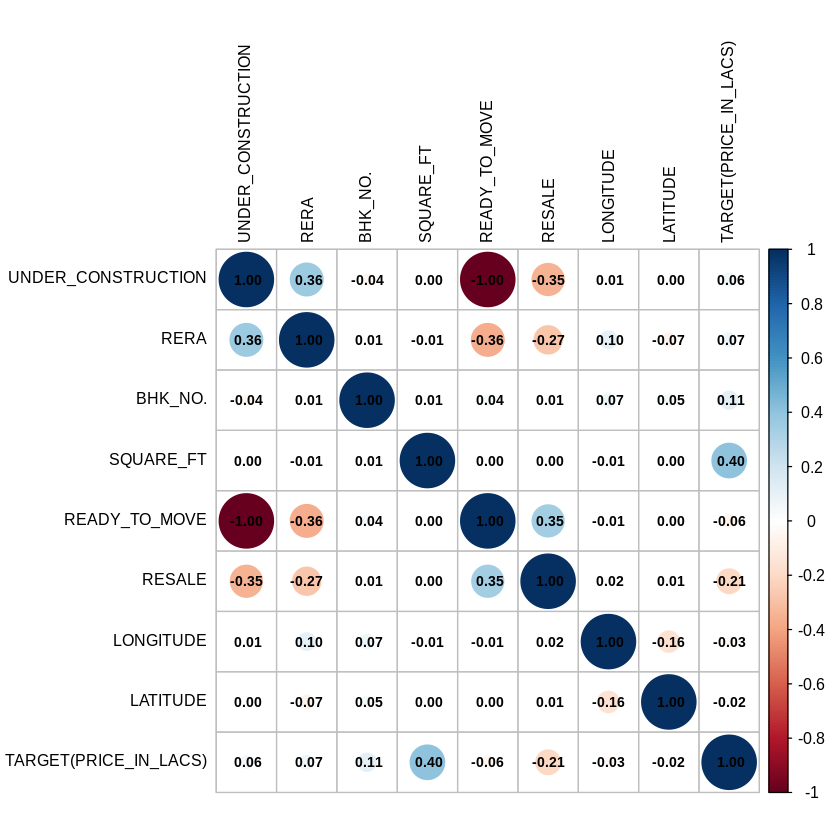

In [ ]:
library(corrplot)

numeric_columns <- sapply(df, is.numeric)
df_numeric <- df[, numeric_columns]

cor_matrix <- cor(df_numeric)
cat("Корреляционная матрица:\n")

corrplot(cor_matrix,
         method = "circle",
         tl.col = "black",
         tl.cex = 0.8,
         diag = TRUE,
         addCoef.col = "black",
         number.cex = 0.7)


In [ ]:
calculate_vif <- function(data) {
  data <- data[, !colnames(data) %in% "UNDER_CONSTRUCTION"]

  vif_values <- numeric(ncol(data))
  names(vif_values) <- colnames(data)

  for (i in 1:ncol(data)) {
    formula <- as.formula(paste("`", colnames(data)[i], "` ~ .", sep = ""))
    model <- lm(formula, data = data)
    r_squared <- summary(model)$r.squared
    vif_values[i] <- 1 / (1 - r_squared)
  }

  return(vif_values)
}

numeric_columns <- sapply(df, is.numeric)
df_numeric <- df[, numeric_columns]

vif_values <- calculate_vif(df_numeric)

cat("Значения VIF для каждого столбца:\n")
print(vif_values)


Значения VIF для каждого столбца:
                 RERA               BHK_NO.             SQUARE_FT 
             1.205325              1.027627              1.207540 
        READY_TO_MOVE                RESALE             LONGITUDE 
             1.252920              1.227894              1.045156 
             LATITUDE TARGET(PRICE_IN_LACS) 
             1.032126              1.282390 


#5. Исследовать зависимости в данных с помощью дисперсионного анализа.

In [ ]:
df$BHK_NO <- as.factor(df$BHK_NO)

categorical_var <- 'BHK_NO.'
numerical_var <- 'SQUARE_FT'

groups <- split(df$SQUARE_FT, df$BHK_NO)

anova_result <- aov(SQUARE_FT ~ BHK_NO, data = df)

anova_summary <- summary(anova_result)

p_value <- anova_summary[[1]]["Pr(>F)"][1, 1]

group_means <- sapply(groups, mean)
overall_mean <- mean(df$SQUARE_FT)
between_group_variance <- sum(table(df$BHK_NO) * (group_means - overall_mean)^2) / (length(groups) - 1)
within_group_variance <- sum(sapply(groups, function(group) sum((group - mean(group))^2))) / (length(df$SQUARE_FT) - length(groups))

f_statistic <- between_group_variance / within_group_variance

cat("F-статистика (по расчетам вручную):", round(f_statistic, 4), "\n")
cat("p-значение (из ANOVA):", round(p_value, 4), "\n")

if (p_value < 0.05) {
  cat("Нулевая гипотеза отклоняется: Средние значения отличаются.\n")
} else {
  cat("Нулевая гипотеза принимается: Средние значения не отличаются.\n")
}


F-статистика (по расчетам вручную): 0.1917 
p-значение (из ANOVA): 0.9997 
Нулевая гипотеза принимается: Средние значения не отличаются.


In [ ]:
install.packages("randomForest")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readr)
library(randomForest)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



#6

In [ ]:
names(df)[names(df) == "TARGET(PRICE_IN_LACS)"] <- "TARGET"

X <- df[, 1:7]
y <- df$TARGET

set.seed(42)
train_indices <- sample(1:nrow(df), size = 0.8 * nrow(df))
X_train <- X[train_indices, ]
y_train <- y[train_indices]
X_test <- X[-train_indices, ]
y_test <- y[-train_indices]

model_rf <- randomForest(X_train, y_train, ntree = 100, mtry = 3, importance = TRUE)

y_pred <- predict(model_rf, X_test)

mse <- mean((y_pred - y_test)^2)
r2 <- 1 - sum((y_pred - y_test)^2) / sum((y_test - mean(y_test))^2)

cat("Mean Squared Error (MSE):", mse, "\n")
cat("R² (коэффициент детерминации):", r2, "\n")


Mean Squared Error (MSE): 35971.68 
R² (коэффициент детерминации): 0.8970275 


In [ ]:
model_lm <- lm(y_train ~ ., data = X_train)

y_pred <- predict(model_lm, newdata = X_test)
mse <- mean((y_pred - y_test)^2)
r2 <- 1 - sum((y_pred - y_test)^2) / sum((y_test - mean(y_test))^2)

cat("Mean Squared Error (MSE):", mse, "\n")
cat("R² (коэффициент детерминации):", r2, "\n")

Mean Squared Error (MSE): 339823.4 
R² (коэффициент детерминации): 0.02722211 
